# The Hawk-Dove Game as a Two-Dimensional Cellular Automaton
### Ashton T. Sperry
#### ashton.sperry@ronininstitute.org

This notebook contains code for modeling the Hawk-Dove game as a two-dimensional automaton (well, almost--it is not entirely deterministic). The following describes the basic model: https://plato.stanford.edu/entries/game-evolutionary/. My model uses a python class with all the necessary functions. It begins with a random distribution of hawks and doves who fight over a resource in a local neighborhood (there can also be a concentration of hawks in the center) Remember that doves are white (with value 0) and hawks are black (with value 1). The population converges towards a mixed equilibrium when the cost of fighting is greater than the value.

I base my code on concepts from Allen Downey's book Think Complexity, 2nd edition (https://github.com/AllenDowney/ThinkComplexity2). Please contact me if you have any corrections, improvements, or questions.

In [1]:
from scipy.signal import correlate2d
import numpy as np

"""Make sure to turn on the matplotlib notebook magic command for animation."""
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
class HawkDove2D:
    """Represents the Hawk-Dove game as a 2-D lattice model."""

    def __init__(self, payoffs, rows):
        """Initializes the automaton.
        
        payoffs: represents the value and cost of fighting or running.
        A: the numpy array that represents the automaton and contains the data.
        P: the numpy array that the first array writes the payoffs on.
        B: the numpy array that the second array writes the new states on."""
        self.payoffs = payoffs
        self.rows = rows
        self.cols = rows
        
        self.A = np.zeros((self.rows, self.cols), dtype = np.uint8)
        self.P = np.zeros_like(self.A)
        self.B = np.zeros_like(self.A)
        
    def init_center(self):
        """Adds a concentration of hawks in the middle of the array."""
        rows, cols = self.A.shape
        radius = min(rows, cols)//20
        i = rows//2
        j = cols//2
        self.A[i-radius:i+radius, j-radius:j+radius] += 1

    def init_random(self, prob=0.5):
        """Start with random values across the array.
        prob: the probability of a cell being a dove."""
        rows, cols = self.A.shape
        for row in range(rows):
            for col in range(cols):
                if np.random.random() < prob:
                    self.A[row, col] = 0
                else:
                    self.A[row, col] = 1

    def step(self):
        """Executes one time step of calculating the payoffs
        and final state values.
        
        kernel: represents a Moore(8) neighborhood. Has a radius of 1.
        v, c, r: the value, cost, and run payoffs."""
        v, c, r = self.payoffs
        rows = self.rows
        cols = self.cols
        
        A = self.A
        P = self.P
        B = self.B
        
        kernel = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
        
        """This counts the number of hawks and doves in a neighborhood.
        It returns an array."""
        h = correlate2d(A, kernel, mode = 'same', boundary = 'wrap')
        d = 9 - h
        
        """This calculates the expected payoff for a cell based on its neighborhood."""
        for row in range(rows):
            for col in range(cols):
                if A[row, col] == 1:
                    P[row, col] = v*d[row, col] + ((v-c)/2)*h[row, col]
                else:
                    P[row, col] = (v/2)*d[row, col] + r*h[row, col]
        
        """This compares a cell's payoff to its neighborhood and switches accordingly.
        It checkes each neighbor for comparison."""
        for row in range(rows):
            for col in range(cols):
                for y in range(-1, 2):
                    for x in range(-1, 2):
                        if P[row, col] >= P[(row+y)%rows, (col+x)%cols]:
                            B[row, col] = A[row, col]
                        else:
                            B[row, col] = A[(row+y)%rows, (col+x)%cols]
        
        return B
    
    def anim_2D(self, steps):
        """Executes the animation for the automaton for the number of time steps."""
        fig = plt.figure()
        ims = []
        
        for s in range(steps):
            im = plt.imshow(self.A, vmin = 0, vmax = 1, cmap = 'binary', animated = True)
            ims.append([im])
            self.A = self.step()
        
        plt.axis('image')
        plt.tick_params(axis = 'both', which = 'both', bottom = False, left = False,
                labelbottom = False, labelleft = False)

        anim = animation.ArtistAnimation(fig, ims, interval = 150, blit = True,
                                repeat_delay = 2000)
        
        #anim.save('game_of_life.mp4', writer = 'ffmpeg', fps = 5)
        return anim
    
    def plot_2D(self, steps):
        """Plots one step of the automaton for the number of time steps."""
        fig = plt.figure()
        
        for s in range(steps):
            plt.pcolor(self.A, vmin = 0, vmax = 1, cmap = 'binary')
            plt.axis('image')
            plt.tick_params(axis = 'both', which = 'both', bottom = False, left = False,
                            labelbottom = False, labelleft = False)
            plt.title('Time Step: ' + str(s))
            plt.draw()
            plt.pause(0.5)
            
            self.A = self.step()

<IPython.core.display.Javascript object>


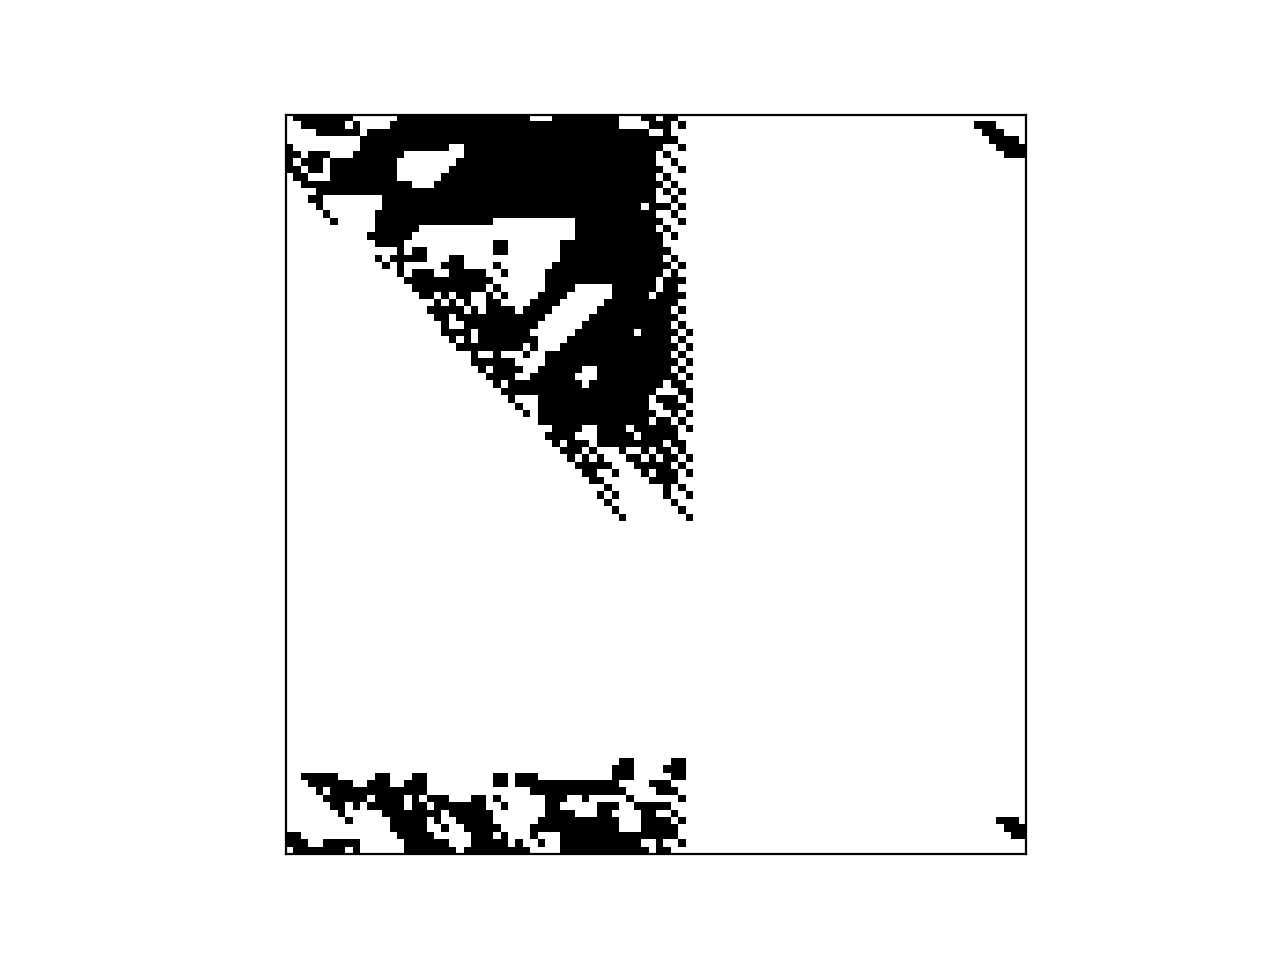

In [7]:
payoffs = 2, 3, 0 # The value, cost, and run payoffs.
rows = 100
steps = 200

center = HawkDove2D(payoffs, rows)
center.init_center()
center.anim_2D(steps)

<IPython.core.display.Javascript object>


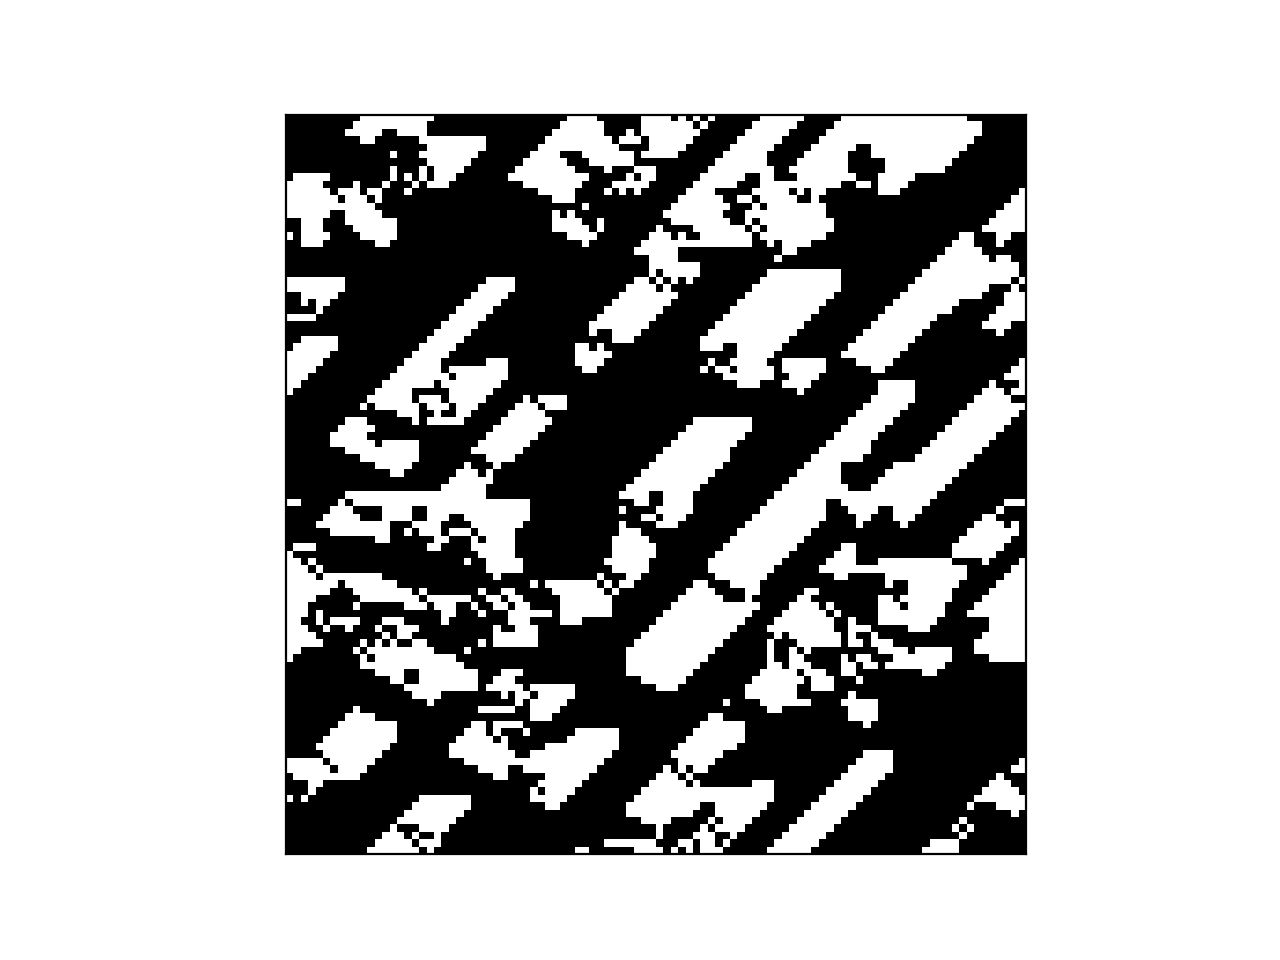

In [8]:
steps = 200
prob = 0.5   # The probability of Dove.

random = HawkDove2D(payoffs, rows)
random.init_random(prob)
random.anim_2D(steps)

The population will converge towards a stable mixed equilibrium when the cost of fighting outweights the value. Otherwise, the game will be the Prisoner's Dilemma: the population will converges towards the strategy Hawk.